In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Load with train/validation split
(ds_train, ds_val), ds_info = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.GMZOJ0_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # normalize
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

num_classes = ds_info.features['label'].num_classes
class_names = ds_info.features['label'].names

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,854 (9.26 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.7318 - loss: 1.0046 - val_accuracy: 0.9280 - val_loss: 0.2125
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.9128 - loss: 0.2683 - val_accuracy: 0.9460 - val_loss: 0.1627
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 65s 47ms/step - accuracy: 0.9306 - loss: 0.2073 - val_accuracy: 0.9523 - val_loss: 0.1423
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 65s 47ms/step - accuracy: 0.9418 - loss: 0.1759 - val_accuracy: 0.9490 - val_loss: 0.1508
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 63s 46ms/step - accuracy: 0.9470 - loss: 0.1542 - val_accuracy: 0.9568 - val_loss: 0.1277
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.9502 - loss: 0.1368 - val_accuracy: 0.9506 - val_loss: 0.1473
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.9507 - loss: 0.1380 - val_accuracy: 0.9572 - val_loss: 0.1280
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.9571 -

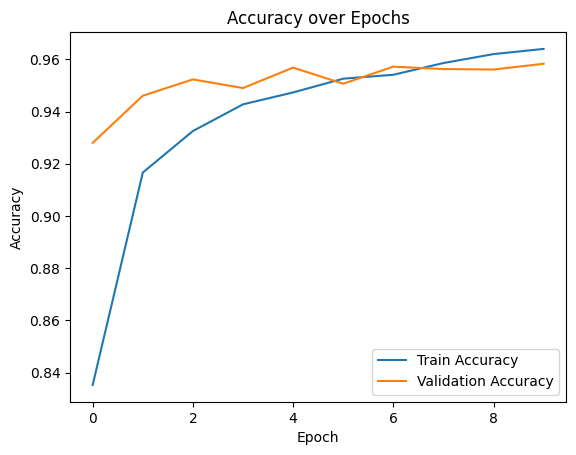

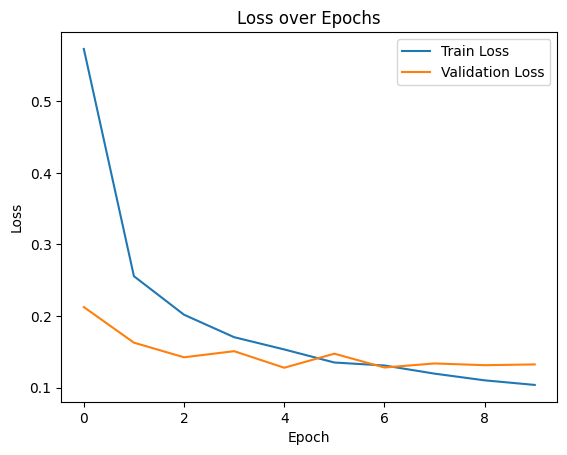

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(ds_val)
print(f"✅ Final Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"🧪 Final Validation Loss: {val_loss:.4f}")

340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9572 - loss: 0.1399
✅ Final Validation Accuracy: 95.83%
🧪 Final Validation Loss: 0.1323


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━

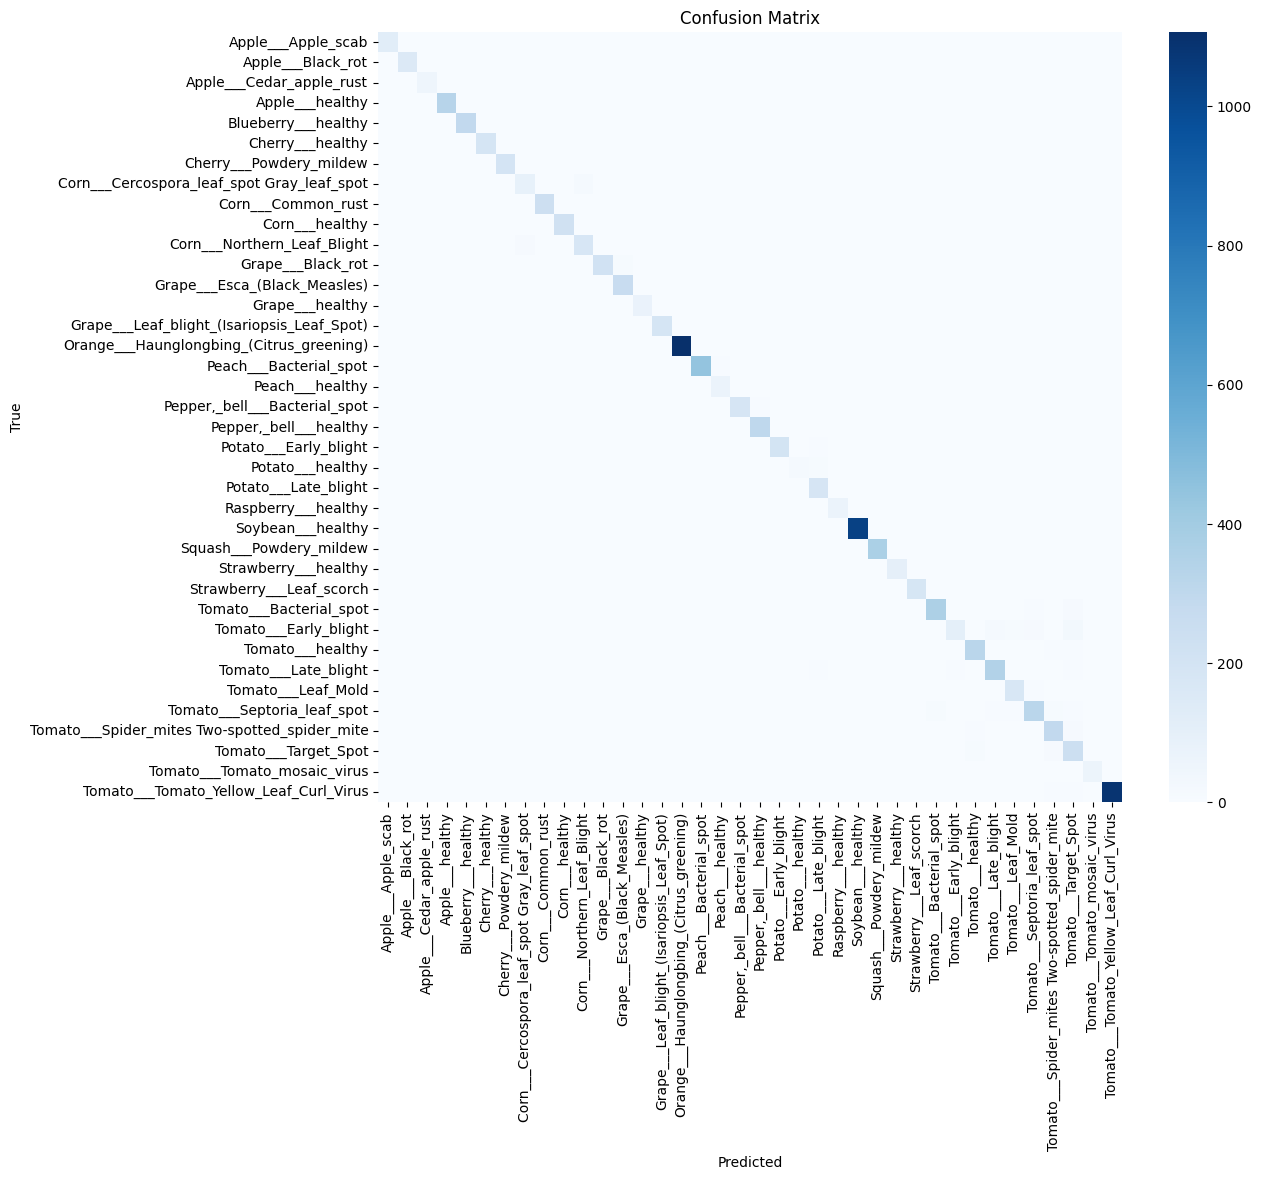

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.98      0.95      0.96       129
                            Apple___Black_rot       0.97      0.99      0.98       154
                     Apple___Cedar_apple_rust       1.00      0.98      0.99        54
                              Apple___healthy       0.99      0.98      0.99       339
                          Blueberry___healthy       0.99      1.00      0.99       292
                             Cherry___healthy       1.00      0.99      1.00       195
                      Cherry___Powdery_mildew       0.99      0.99      0.99       201
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.82      0.83       108
                           Corn___Common_rust       1.00      1.00      1.00       239
                               Corn___healthy       1.00      1.00      1.00       223
                  Corn___Northern_Leaf_Bli

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in ds_val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
# Save the trained model with your preferred filename
model.save('best_model_leaf.h5')

# Save the class names mapping to a JSON file
import json
with open('class_indices.json', 'w') as f:
    json.dump({i: name for i, name in enumerate(class_names)}, f)

# Download both files to your local machine
from google.colab import files
files.download('best_model_leaf.h5')
files.download('class_indices.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>